# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [56]:
type(cities)

list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
cleaned_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
set_count = 1
count = 1
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities: 
    response_json = requests.get(query_url + city).json()
    
    try: 
        
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(round((response_json['main']['temp_max']*1.8+32),2))
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        cleaned_cities.append(city)
        if count == 50:
            print(f"Processing Record {count} of Set {set_count} |{city}")
            count = 1
            set_count += 1
        elif count != 50:
            print(f"Processing Record {count} of Set {set_count} |{city}")
            count += 1
            
    except:
        print("City not found. Skipping...")
        pass
    


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 |inhambane
Processing Record 2 of Set 1 |jumla
Processing Record 3 of Set 1 |upernavik
Processing Record 4 of Set 1 |vaini
Processing Record 5 of Set 1 |auki
Processing Record 6 of Set 1 |atuona
Processing Record 7 of Set 1 |san patricio
City not found. Skipping...
Processing Record 8 of Set 1 |faanui
Processing Record 9 of Set 1 |broome
Processing Record 10 of Set 1 |rikitea
Processing Record 11 of Set 1 |mar del plata
Processing Record 12 of Set 1 |miramar
Processing Record 13 of Set 1 |bengkulu
Processing Record 14 of Set 1 |punta arenas
Processing Record 15 of Set 1 |geraldton
Processing Record 16 of Set 1 |bubaque
Processing Record 17 of Set 1 |barrow
Processing Record 18 of Set 1 |port hardy
City not found. Skipping...
Processing Record 19 of Set 1 |ushuaia
Processing Record 20 of Set 1 |berlevag
Processing Record 21 of Set 1 |siyana
Processing Record 22 of Set 1 |butaritari
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
city_data = pd.DataFrame({"City":cleaned_cities,
                          "Lat":lat,
                          "Lng":lng,
                          "Max Temp":max_temp,
                          "Humidity":humidity,
                          "Cloudiness":cloudiness,
                          "Wind Speed":wind_speed,
                          "Country":country,
                          "Date":date})


city_data.to_csv(output_data_file)

In [59]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inhambane,-23.86,35.38,71.60,68,40,5.10,MZ,1595262256
1,jumla,29.27,82.18,59.92,69,68,1.54,NP,1595262814
2,upernavik,72.79,-56.15,51.39,47,14,3.12,GL,1595262217
3,vaini,-21.20,-175.20,71.60,83,40,3.60,TO,1595262721
4,auki,-8.77,160.70,76.59,87,14,2.45,SB,1595262261


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
clean_city_data = city_data.loc[city_data["Humidity"]<=100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inhambane,-23.86,35.38,71.60,68,40,5.10,MZ,1595262256
1,jumla,29.27,82.18,59.92,69,68,1.54,NP,1595262814
2,upernavik,72.79,-56.15,51.39,47,14,3.12,GL,1595262217
3,vaini,-21.20,-175.20,71.60,83,40,3.60,TO,1595262721
4,auki,-8.77,160.70,76.59,87,14,2.45,SB,1595262261


In [61]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,19.476704,16.833407,71.433093,67.357407,50.144444,3.426741,1.595263e+09
std,33.004389,90.667700,14.712225,22.316829,36.989261,2.250178,1.907241e+02
min,-54.800000,-179.170000,26.600000,2.000000,0.000000,0.060000,1.595262e+09
25%,-8.512500,-65.275000,61.037500,56.000000,14.000000,1.797500,1.595263e+09
50%,23.040000,22.310000,73.400000,72.000000,45.000000,2.890000,1.595263e+09
75%,46.870000,96.220000,81.932500,84.000000,90.000000,4.600000,1.595263e+09
max,78.220000,179.320000,115.070000,100.000000,100.000000,13.450000,1.595263e+09


In [62]:
# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file,index=False)

In [63]:
time.gmtime(date[0])

time.struct_time(tm_year=2020, tm_mon=7, tm_mday=20, tm_hour=16, tm_min=24, tm_sec=16, tm_wday=0, tm_yday=202, tm_isdst=0)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

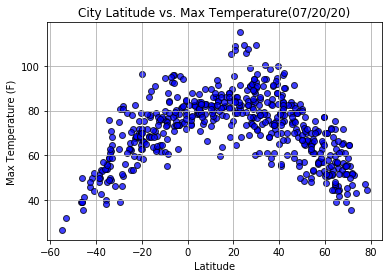

In [64]:
plt.scatter(lat,max_temp,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"City Latitude vs. Max Temperature(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Latitude_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

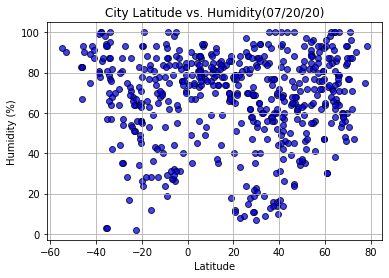

In [65]:
plt.scatter(lat,humidity,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"City Latitude vs. Humidity(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

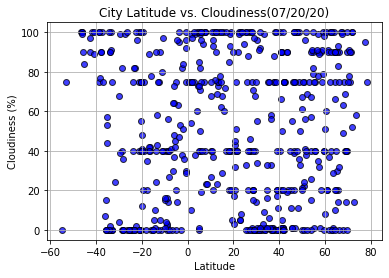

In [66]:
plt.scatter(lat,cloudiness,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"City Latitude vs. Cloudiness(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

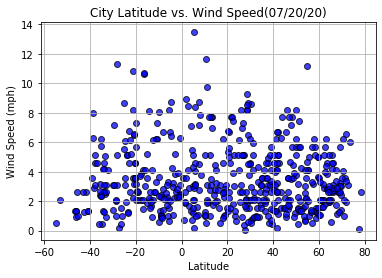

In [67]:
plt.scatter(lat,wind_speed,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"City Latitude vs. Wind Speed(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/Latitude_vs_Wind_Speed.png")

## Linear Regression

In [68]:
# OPTIONAL: Create a function to create Linear Regression plots
# def scatterplot(x,y):
#     plt.scatter(x,y,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
#     plt.title(f"City Latitude vs. Wind Speed(07/19/20)")
#     plt.xlabel("Latitude")
#     plt.ylabel("Wind Speed (mph)")
def regressplot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xy=(0.1, 0.1),fontsize=15,color="red",xycoords='axes fraction')
    print(f"The r-squared is:{rvalue**2}")

In [69]:
# Create Northern and Southern Hemisphere DataFrames
north_city = clean_city_data.loc[clean_city_data["Lat"]>0]
south_city = clean_city_data.loc[clean_city_data["Lat"]<0]
n_lat = north_city["Lat"]
n_max = north_city["Max Temp"]
n_hum = north_city["Humidity"]
n_clo = north_city["Cloudiness"]
n_wind = north_city["Wind Speed"]
s_lat = south_city["Lat"]
s_max = south_city["Max Temp"]
s_hum = south_city["Humidity"]
s_clo = south_city["Cloudiness"]
s_wind = south_city["Wind Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.4438754890493174


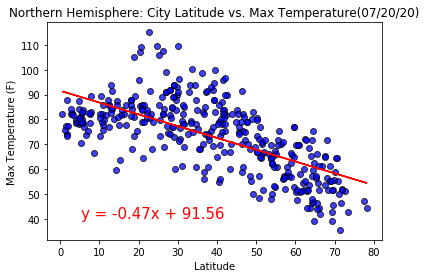

In [70]:
plt.scatter(n_lat,n_max,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Northern Hemisphere: City Latitude vs. Max Temperature(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
regressplot(n_lat,n_max)
plt.savefig("../output_data/n_Latitude_vs_Max_Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.6013770775461519


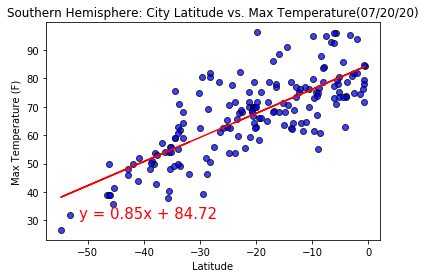

In [71]:
plt.scatter(s_lat,s_max,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Southern Hemisphere: City Latitude vs. Max Temperature(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
regressplot(s_lat,s_max)
plt.savefig("../output_data/s_Latitude_vs_Max_Temperature.png")

##### These two linear regressions are modelling the relationships between maximum temperature and latitude for cities in the northern hemisphere and for theses in the southern hemishere seperately.
1. There is a relationship between the maximum temperature and the latitude: both of r-square values from these two regressions are relatively large.
2.Generally, for cities in the northern hemisphere, the maximum temperature decreases as the latitude increases; while for cities in the northern hemisphere, the maximum temperature increases as the latitude increases and in the southern hemishere.That is may because that the closer the city is to the equator, the more possible the temperature increases.
3. The relationship maybe stronger for cities in the southern hemishere than that for as the cities in the northern hemishere, as r-square value for cities in the southern hemishere is larger.
4. Limitation: There are more random samples in the northern hemisephere than that in the southern hemisephere, which may result in inaccurate comparisions between northern hemisephere and southern hemisephere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.0005696999587025715


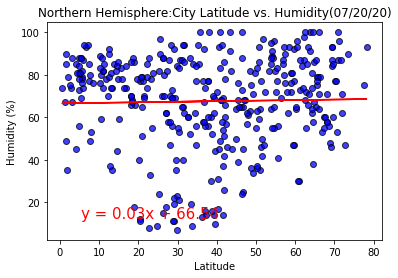

In [72]:
plt.scatter(n_lat,n_hum,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Northern Hemisphere:City Latitude vs. Humidity(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
regressplot(n_lat,n_hum)
plt.savefig("../output_data/n_Latitude_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.043920305870446125


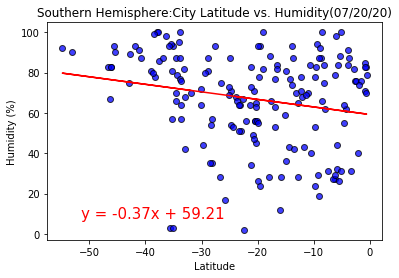

In [73]:
plt.scatter(s_lat,s_hum,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Southern Hemisphere:City Latitude vs. Humidity(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
regressplot(s_lat,s_hum)
plt.savefig("../output_data/s_Latitude_vs_Humidity.png")

##### These two linear regressions are modelling the relationships between humidity and latitude for cities in the northern hemisphere and for theses in the southern hemishere seperately.
1. There maybe no relationships between the humidity and the latitude: both of r-square values from these two regressions are relatively small and are almost near 0.
2. Limitation: There are more random samples in the northern hemisephere than that in the southern hemisephere, which may result in inaccurate comparisions between northern hemisephere and southern hemisephere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.0021262217417403464


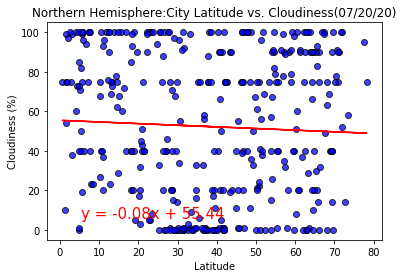

In [74]:
plt.scatter(n_lat,n_clo,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Northern Hemisphere:City Latitude vs. Cloudiness(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
regressplot(n_lat,n_clo)
plt.savefig("../output_data/n_Latitude_vs_Cloudiness.png")

##### These two linear regressions are modelling the relationships between cloudiness and latitude for cities in the northern hemisphere and for theses in the southern hemishere seperately.
1. There maybe no relationships between the cloudiness and the latitude: both of r-square values from these two regressions are relatively small and are almost near 0. 
2. Limitation: There are more random samples in the northern hemisephere than that in the southern hemisephere, which may result in inaccurate comparisions between northern hemisephere and southern hemisephere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.02425578566868879


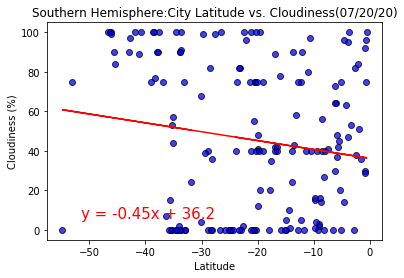

In [75]:
plt.scatter(s_lat,s_clo,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Southern Hemisphere:City Latitude vs. Cloudiness(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
regressplot(s_lat,s_clo)
plt.savefig("../output_data/s_Latitude_vs_Cloudiness.png")

##### These two linear regressions are modelling the relationships between cloudiness and latitude for cities in the northern hemisphere and for theses in the southern hemishere seperately.
1. Both of r-square values from these two regressions are relatively small and are almost near 0, which means there maybe no relationships between the cloudiness and the latitude. 
2. Limitation: There are more random samples in the northern hemisephere than that in the southern hemisephere, which may result in inaccurate comparisions between northern hemisephere and southern hemisephere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.012631514136746501


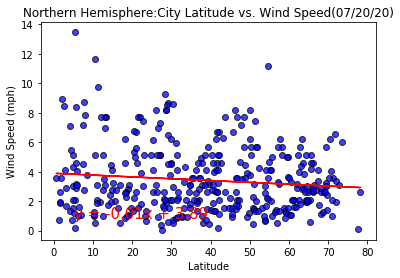

In [76]:
plt.scatter(n_lat,n_wind,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Northern Hemisphere:City Latitude vs. Wind Speed(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
regressplot(n_lat,n_wind)
plt.savefig("../output_data/n_Latitude_vs_Wind_Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.006716800283468666


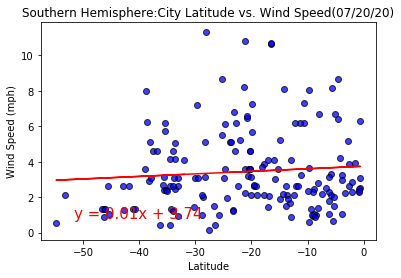

In [77]:
plt.scatter(s_lat,s_wind,marker = 'o', facecolors = 'blue',edgecolors = 'black',alpha = 0.75)
plt.title(f"Southern Hemisphere:City Latitude vs. Wind Speed(07/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
regressplot(s_lat,s_wind)
plt.savefig("../output_data/s_Latitude_vs_Wind_Speed.png")

##### These two linear regressions are modelling the relationships between wind speed and latitude for cities in the northern hemisphere and for theses in the southern hemishere seperately.
1. There maybe no relationships between the wind speed and the latitude:both of r-square values from these two regressions are relatively small and are almost near 0. 
2. Limitation: There are more random samples in the northern hemisephere than that in the southern hemisephere, which may result in inaccurate comparisions between northern hemisephere and southern hemisephere.